# Environment

In [30]:
import os
import sys
import numpy as np
import pandas as pd

# Set working directory
# work_dir = '/home/michal.kubacki/Githubs/GeneScore/trimmed_Evaluation'
work_dir = 'D:/Github/GeneScore/trimmed_Evaluation'
# work_dir = '/mnt/d/Github/GeneScore/trimmed_Evaluation'
os.chdir(work_dir)

# Load environment variables from .env file
from dotenv import load_dotenv

# Explicitly specify the path to the .env file
env_path = os.path.join(work_dir, '.env')
load_dotenv(env_path)

# Get environment variables with error handling
project_functions_path = os.getenv('PROJECT_FUNCTIONS_PATH')
if not project_functions_path:
    raise ValueError("PROJECT_FUNCTIONS_PATH environment variable not found in .env file")

print(f"Using PROJECT_FUNCTIONS_PATH: {project_functions_path}")
sys.path.insert(0, project_functions_path)

import evaluated_helpers

import importlib
importlib.reload(evaluated_helpers)

from evaluated_helpers import *

Using PROJECT_FUNCTIONS_PATH: D:/Github/GeneScore/project_functions


In [31]:
base_path = os.getenv('BASE_PATH')
gene_set = "L2-3_CUX2"

# Load Gene Sets Data 

In [32]:
gere_sets_dict_celloracle, gene_sets_dict_cell_type_first_celloracle = load_GRNs_gene_sets(root_dir=base_path, gene_set_list = [gene_set], weights_list="scores_grn_all_from_comb_run_new.csv")

loading data from: D:/Github/GeneScore/herring_minimal\L2-3_CUX2\celloracle


# Analyse separately

In [33]:
goi = "RARA"
score = "coef_mean"

### Remove duplicates

In [34]:
print(gene_sets_dict_cell_type_first_celloracle[gene_set][gene_set].keys())
gois = gene_sets_dict_cell_type_first_celloracle[gene_set][gene_set].keys()

dict_keys(['GLI1', 'GLI2', 'GLI3', 'GLI4', 'RARA', 'RARB', 'RARG', 'RXRA', 'RXRB', 'RXRG'])


In [35]:
data={key: gene_sets_dict_cell_type_first_celloracle[gene_set][gene_set][key]["targets"] for key in gois}
duplicates = print_number_of_duplicate_genes(data)

for GLI1 no duplicates found
for GLI2 no duplicates found
for GLI3 no duplicates found
for GLI4 no duplicates found
for RARA no duplicates found
for RARB no duplicates found
for RARG no duplicates found
for RXRA no duplicates found
for RXRB no duplicates found
for RXRG no duplicates found


In [38]:
if duplicates:
    gene_sets_dict_cell_type_first_celloracle = remove_duplicates_preserve_order_GRNs(gene_sets_dict_cell_type_first_celloracle)
    data={key: gene_sets_dict_cell_type_first_celloracle[gene_set][gene_set][key]["targets"] for key in gois}
    print_number_of_duplicate_genes(data)

### Statistics

In [45]:
sets = list(gene_sets_dict_cell_type_first_celloracle.keys())
cell_types = list(gene_sets_dict_cell_type_first_celloracle[gene_set].keys())
scored_genes = list(gene_sets_dict_cell_type_first_celloracle[gene_set][gene_set].keys())
print(scored_genes)
print(len(gene_sets_dict_cell_type_first_celloracle[gene_set][gene_set][goi]['targets']))

['GLI1', 'GLI2', 'GLI3', 'GLI4', 'RARA', 'RARB', 'RARG', 'RXRA', 'RXRB', 'RXRG']
13


In [46]:
for cell_type in cell_types:
    strings = [f"{scored_gene}: {len(gene_sets_dict_cell_type_first_celloracle[gene_set][cell_type][scored_gene]['targets'])}" for scored_gene in scored_genes]
    print(f'{cell_type}: {strings}') 


L2-3_CUX2: ['GLI1: 2', 'GLI2: 22', 'GLI3: 17', 'GLI4: 2', 'RARA: 13', 'RARB: 8', 'RARG: 4', 'RXRA: 22', 'RXRB: 7', 'RXRG: 8']


### Heatmap

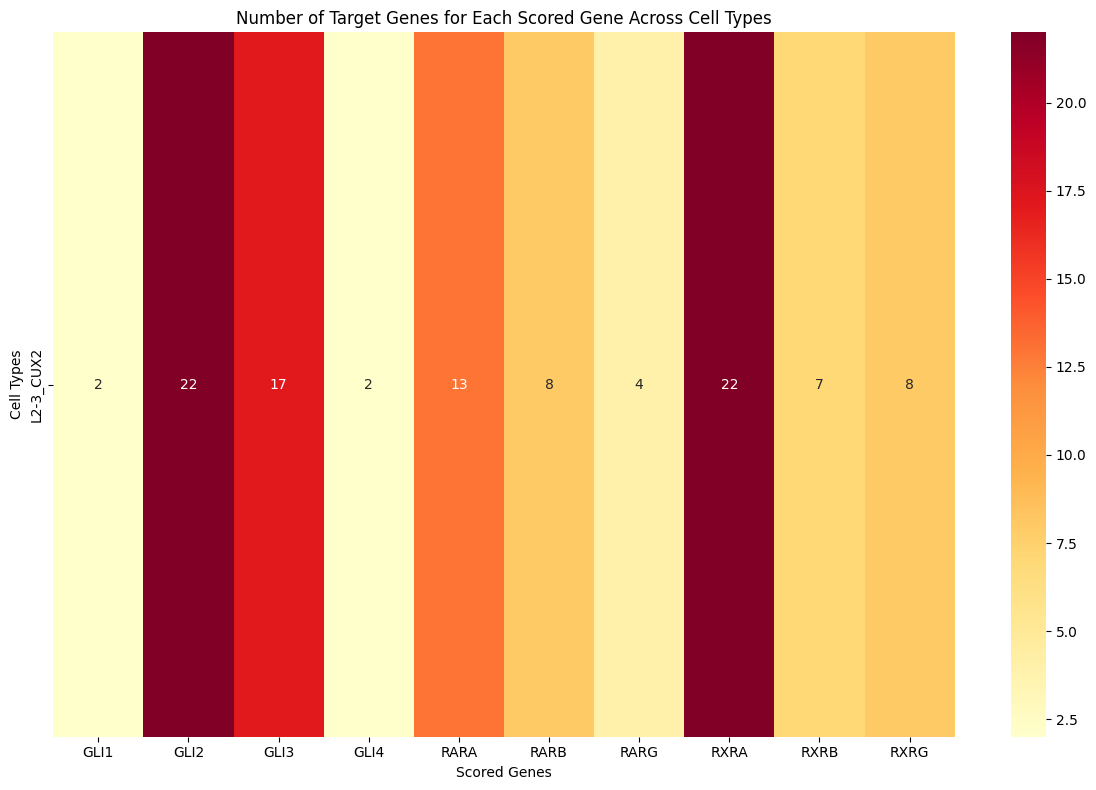

In [44]:
create_heatmap(gene_sets_dict_cell_type_first_celloracle, gene_set, scored_genes, cell_types)

### Venn diagrams

In [47]:
scored_genes=["RARA", "THRB", "AR"]
cell_type = "L2-3_CUX2"
analyze_gene_sets_gene_set(gene_sets_dict_cell_type_first_celloracle, gene_set, cell_type=cell_type, scored_genes=scored_genes, mode="positive", printouts=True)


Shared genes between the sets:
More than 3 sets detected for L2-3_CUX2, coefficients: positive. Displaying text-based representation.


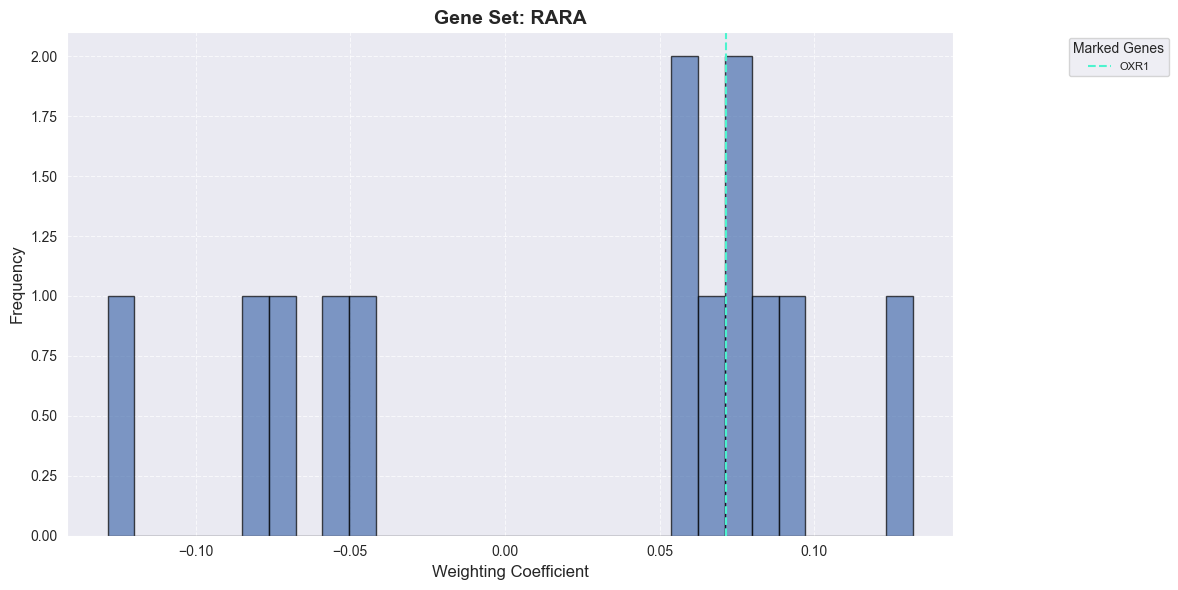

In [51]:
genes_to_mark = ['PAM', 'EPHA6', 'OXR1', 'RBFOX1', 'RASGRF2', 'CPVL']
better_hist_GRNs(gene_sets_dict_cell_type_first_celloracle, gene_set, gene_set, goi, score="coef_mean", bins=30, genes_to_mark=genes_to_mark)

D:\Github/GeneScore/project_functions\evaluated_helpers.py:621: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Marked Genes", title_fontsize=10, fontsize=8, loc='upper right', bbox_to_anchor=(1.25, 1))


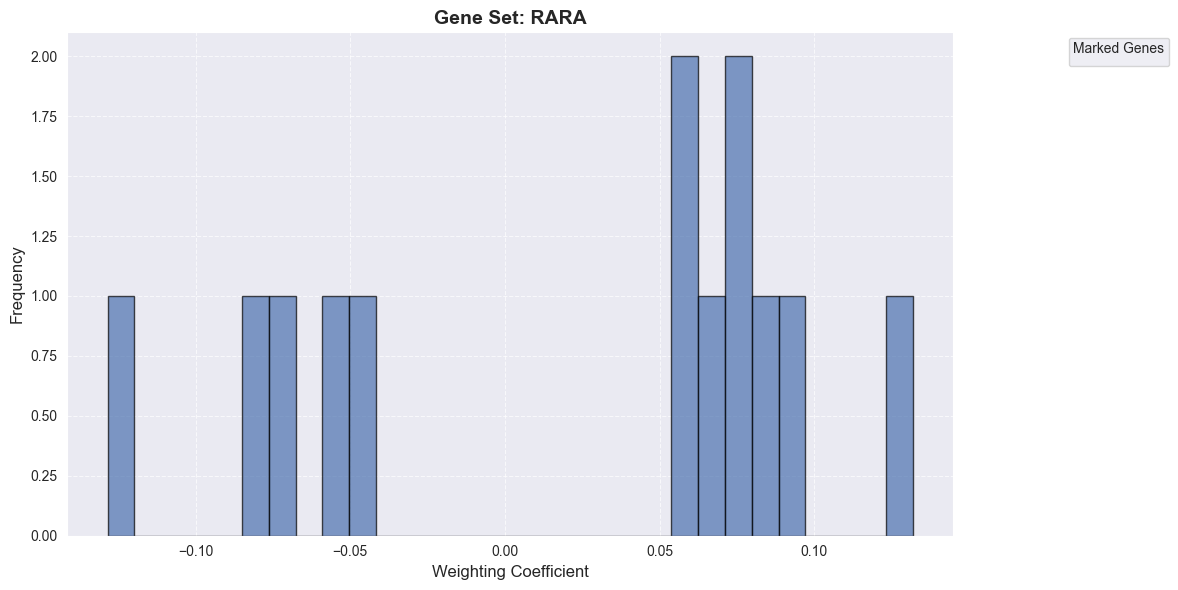

In [52]:
genes_to_mark = ['BDNF', 'PRKG2', 'KIRREL3', 'CUX1', 'UBB']
better_hist_GRNs(gene_sets_dict_cell_type_first_celloracle, gene_set, gene_set, goi, score="coef_mean", bins=30, genes_to_mark=genes_to_mark)

In [53]:
scored_genes=["RARA", "THRB", "AR"]
cell_type = gene_set
analyze_gene_sets_gene_set(gene_sets_dict_cell_type_first_celloracle, gene_set, cell_type=cell_type, scored_genes=scored_genes, mode="negative")

More than 3 sets detected for L2-3_CUX2, coefficients: negative. Displaying text-based representation.



Unique genes for each set:
L2-3_CUX2: {'PHYHIPL', 'RASGRF2', 'LINC-PINT'}
L4_RORB: {'PTPRZ1', 'ELMO1'}
L5-6_THEMIS: set()


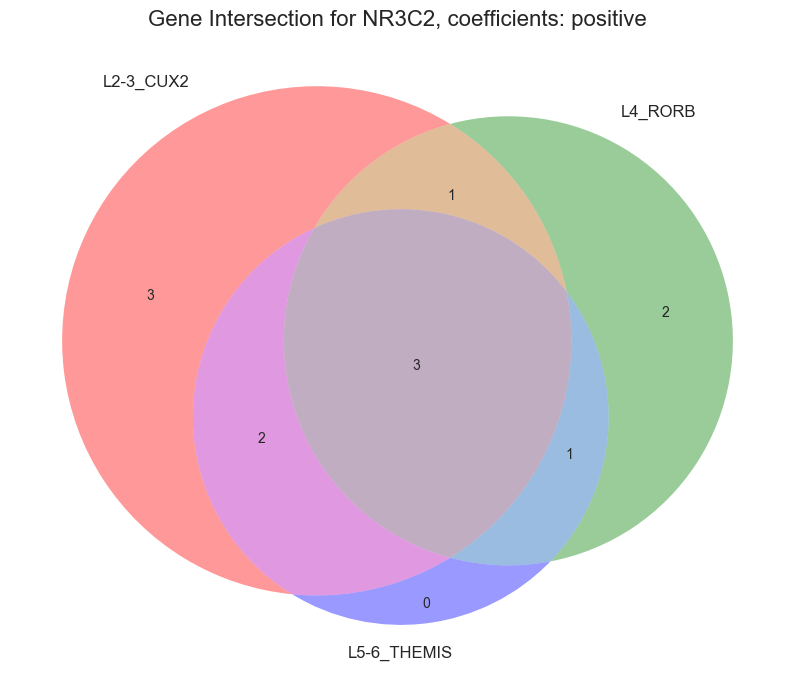

In [ ]:
cell_types=["L2-3_CUX2", "L4_RORB", "L5-6_THEMIS"]
scored_gene="NR3C2"

analyze_gene_sets_cell_types(gene_sets_dict_cell_type_first_celloracle, set_selected, scored_gene, cell_types, mode = "positive", printouts=True)

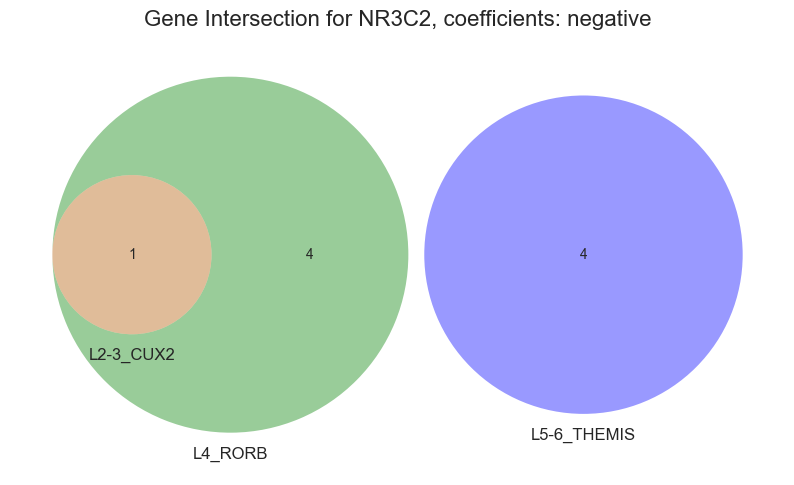

In [ ]:
cell_types=["L2-3_CUX2", "L4_RORB", "L5-6_THEMIS"]
scored_gene="NR3C2"

analyze_gene_sets_cell_types(gene_sets_dict_cell_type_first_celloracle, set_selected, scored_gene, cell_types, mode = "negative")

### Histograms

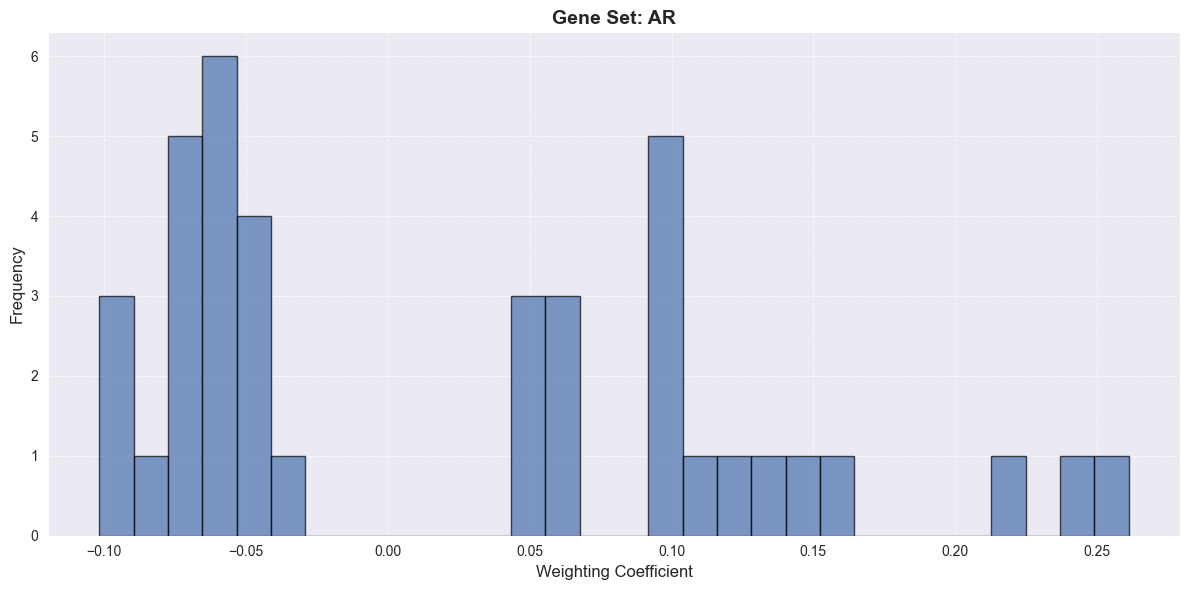

In [ ]:
better_hist_GRNs(gene_sets_dict_cell_type_first_celloracle, set_selected, cell_type_selected, "AR", score="coef_mean", bins=30)

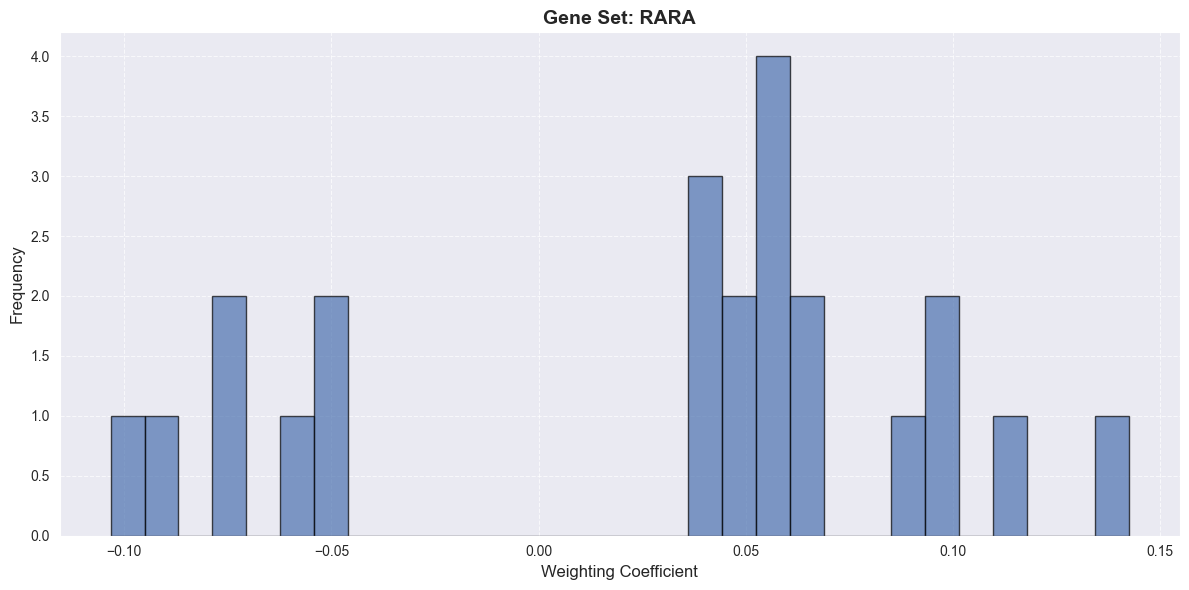

In [ ]:
better_hist_GRNs(gene_sets_dict_cell_type_first_celloracle, set_selected, cell_type_selected, scored_gene_selected, score="coef_mean", bins=30)

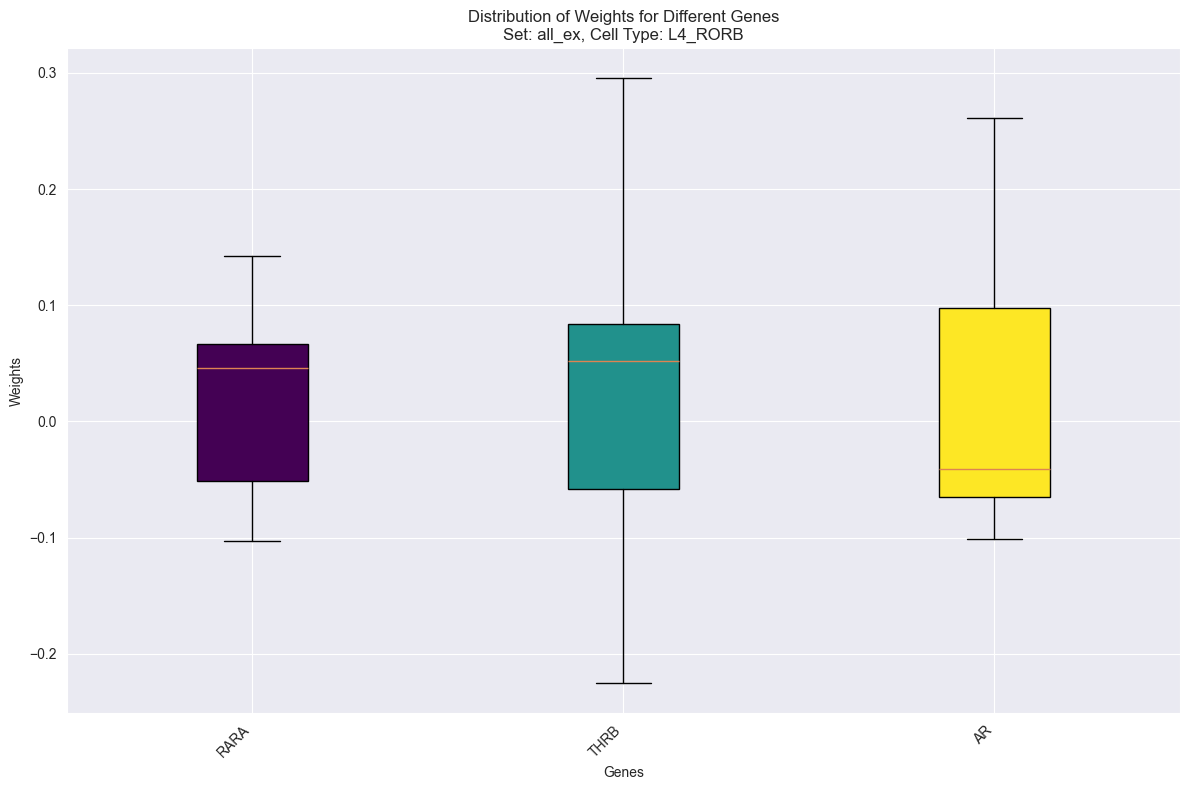

In [ ]:
visualize_weight_distributions(gene_sets_dict_cell_type_first_celloracle, set_selected, cell_type_selected, scored_genes, score_type="coef_mean")

### Intersections

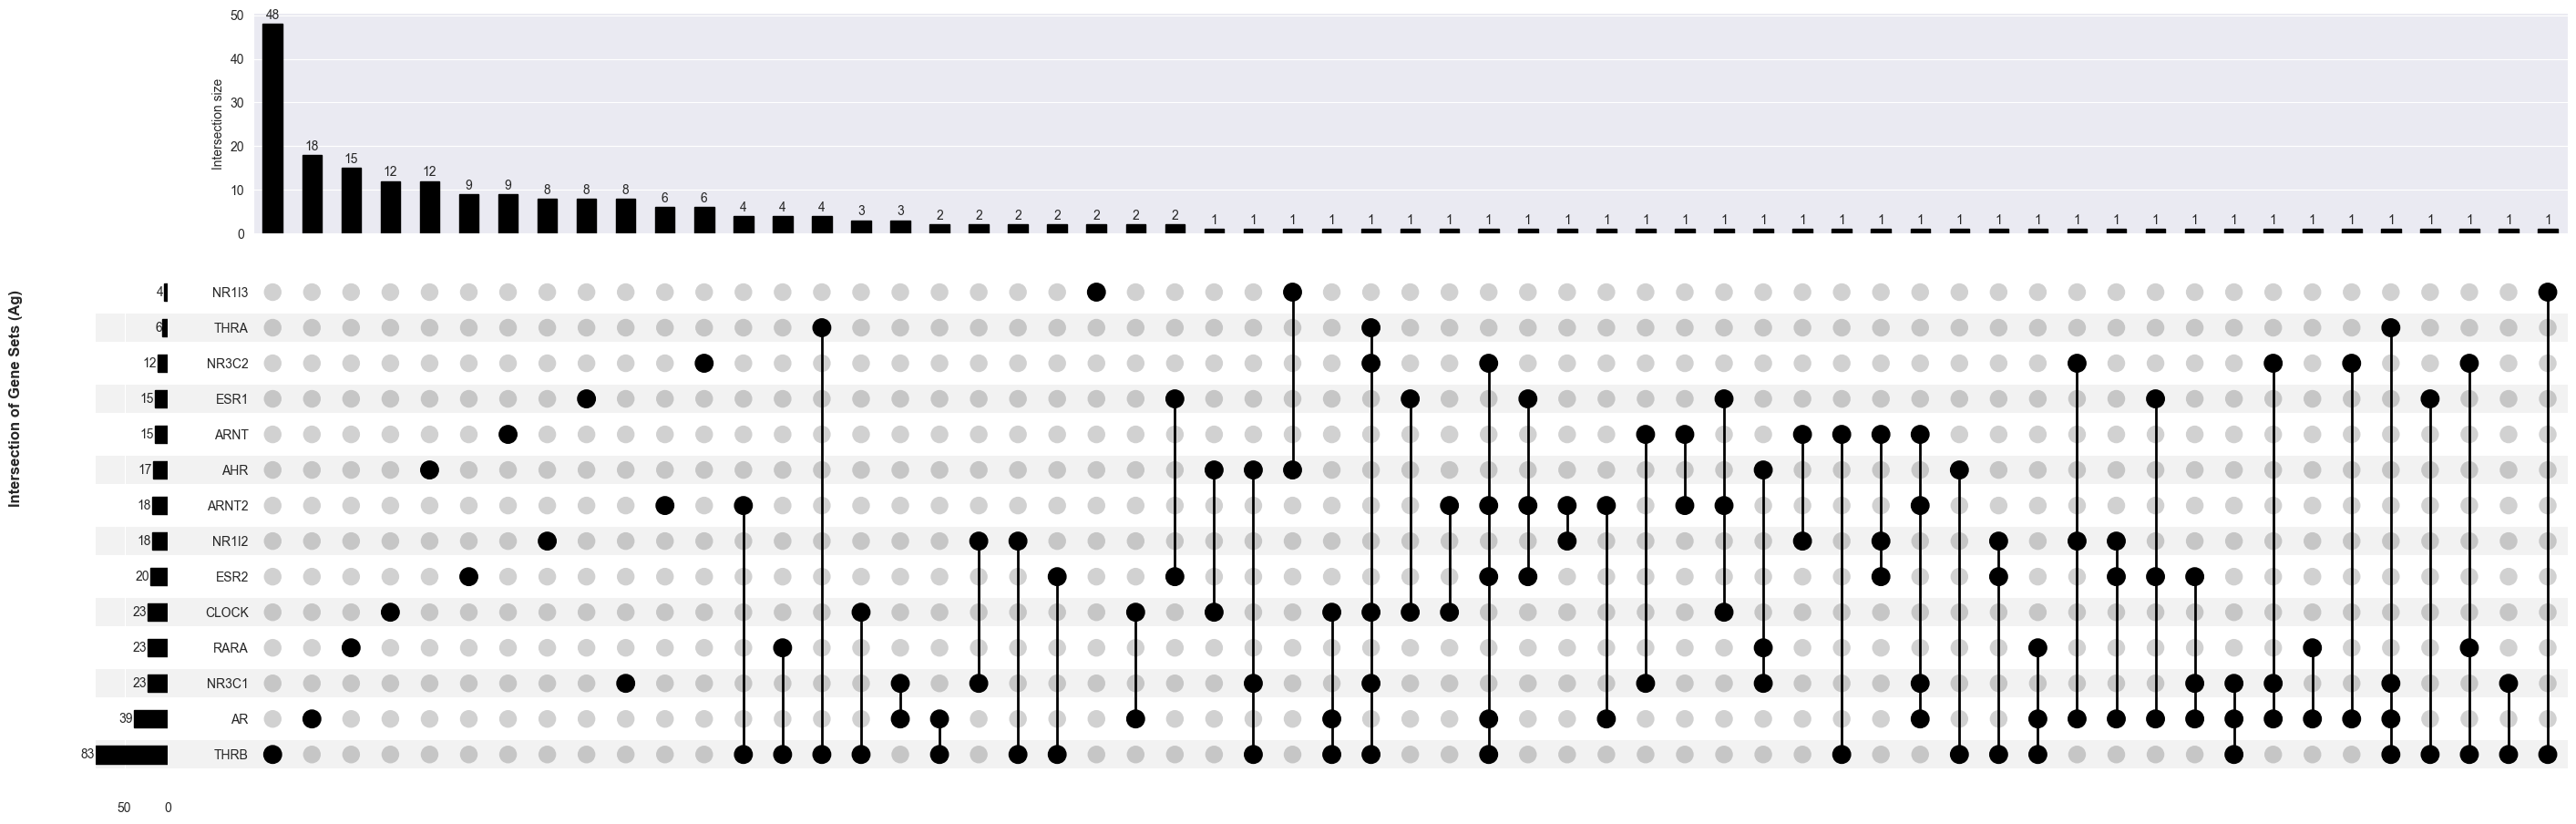

In [ ]:
data={key: gene_sets_dict_cell_type_first_celloracle[set_selected][cell_type_selected][key]["targets"] for key in gois}

plot_gene_set_intersections(data, title="Intersection of Gene Sets (Ag)")

### Histograms of the unique genes

Unique genes for each set:

L2-3_CUX2: {'SASH1', 'HTR1B', 'MICAL2', 'BCL9', 'RASGRF2'}

L4_RORB: {'GFRA1', 'RGS6', 'ATF5', 'GDF5', 'NCAM2', 'SESN3', 'FN1', 'KIF26B', 'NR4A3', 'PTPRZ1', 'TUBB2B', 'SOX5', 'BHLHE22', 'LINGO2'}

L5-6_THEMIS: {'HIST1H1E', 'COMMD3-BMI1', 'ETV5', 'TXNIP', 'CH25H', 'USP39', 'RARB', 'HIST1H2BN', 'LPL'}

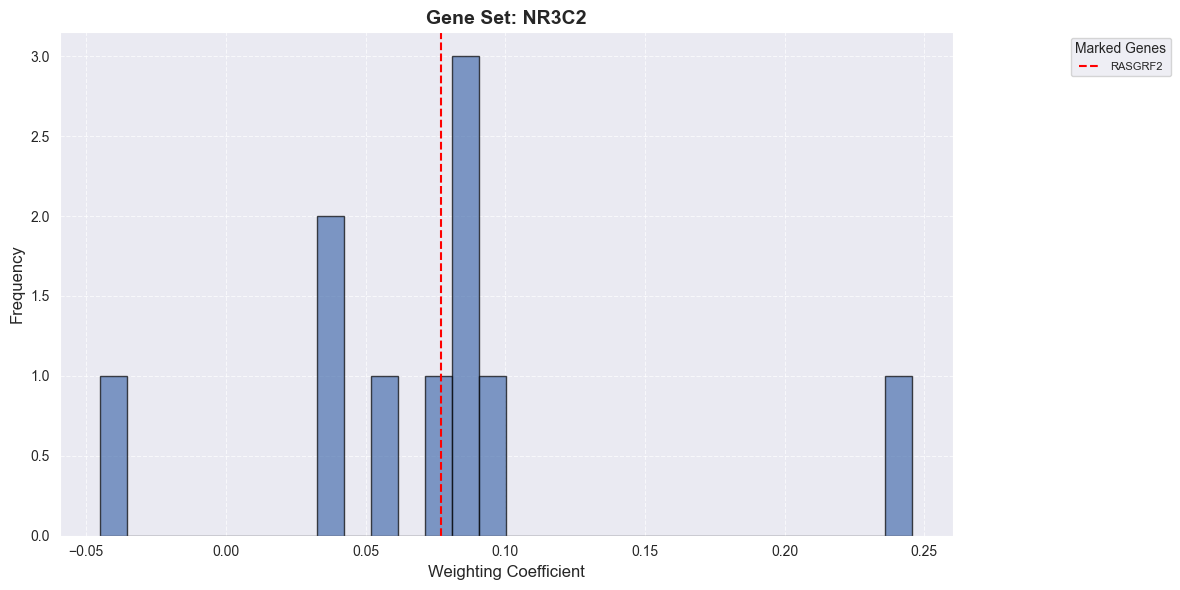

In [ ]:
genes_to_mark = ['SASH1', 'HTR1B', 'MICAL2', 'BCL9', 'RASGRF2']
better_hist_GRNs(gene_sets_dict_cell_type_first_celloracle, set_selected, "L2-3_CUX2", "NR3C2", score="coef_mean", bins=30, genes_to_mark=genes_to_mark)

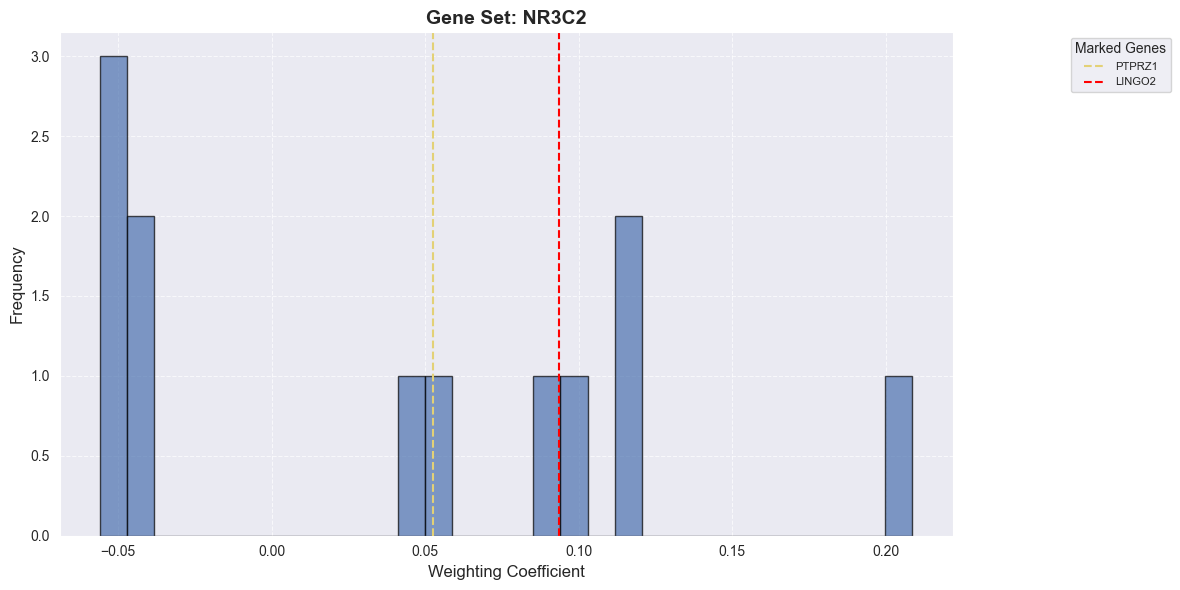

In [ ]:
genes_to_mark = ['GFRA1', 'RGS6', 'ATF5', 'GDF5', 'NCAM2', 'SESN3', 'FN1', 'KIF26B', 'NR4A3', 'PTPRZ1', 'TUBB2B', 'SOX5', 'BHLHE22', 'LINGO2']
better_hist_GRNs(gene_sets_dict_cell_type_first_celloracle, set_selected, "L4_RORB", "NR3C2", score="coef_mean", bins=30, genes_to_mark=genes_to_mark)

D:\Github/GeneScore/project_functions\evaluated_helpers.py:612: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Marked Genes", title_fontsize=10, fontsize=8, loc='upper right', bbox_to_anchor=(1.25, 1))


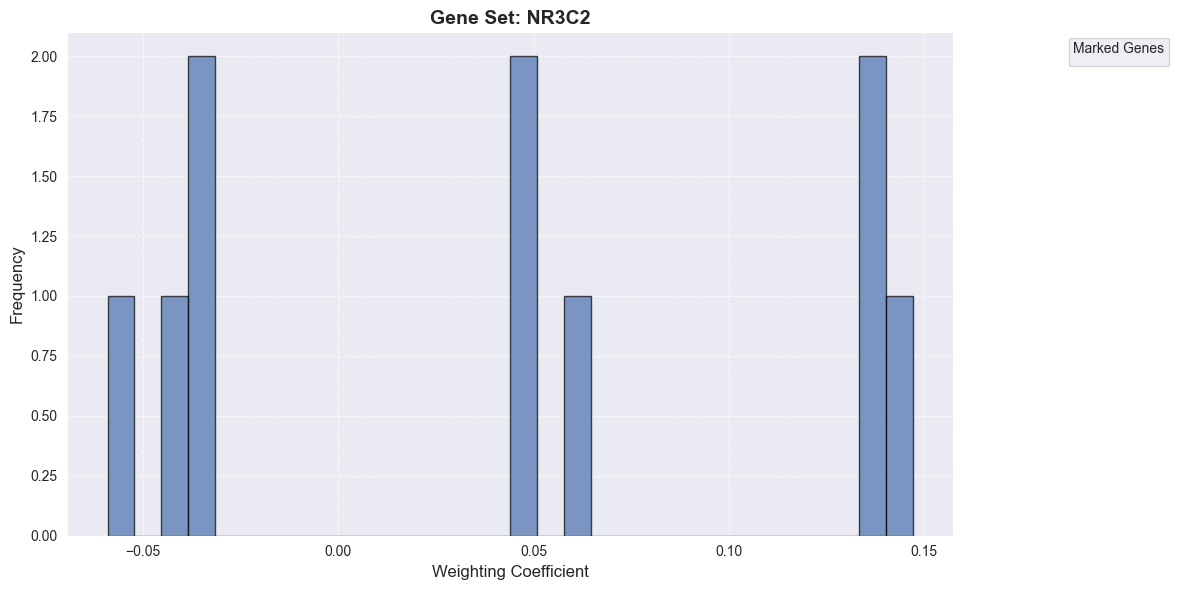

In [ ]:
genes_to_mark = ['HIST1H1E', 'COMMD3-BMI1', 'ETV5', 'TXNIP', 'CH25H', 'USP39', 'RARB', 'HIST1H2BN', 'LPL']
better_hist_GRNs(gene_sets_dict_cell_type_first_celloracle, set_selected, "L5-6_THEMIS", "NR3C2", score="coef_mean", bins=30, genes_to_mark=genes_to_mark)